## オームの法則の可視化


オームの法則は $𝑉 = 𝐼 \times 𝑅$
つまり「電流$I$と抵抗$R$の積が電圧$V$になる」ということです。

この形の場合、独立変数IとRの積が、従属変数Vの値になりますが、これをグラフにするとなると２つのアプローチがあります。

- 独立変数の片方を固定して、残りの独立変数をX軸に、従属変数VをY軸に取る２次元グラフ（平面グラフ）
- 独立変数の両方をX軸とY軸に取り、従属変数VをZ軸に取る３次元グラフ（立体グラフ）

どちらがよりV,I,Rの関係を直観的に捉えるのに適しているでしょうか？

私は今回３次元グラフでスタートして、それをより理解できるように次元を一つ抜いて２次元グラフで考えて、両方を統一的に理解することでオームの法則を根本的に理解することが出来たので紹介します。

### $𝑉 = 𝐼 × 𝑅$ を３次元で可視化してみる

まずは３次元グラフにサーフェイスプロットしてみます。

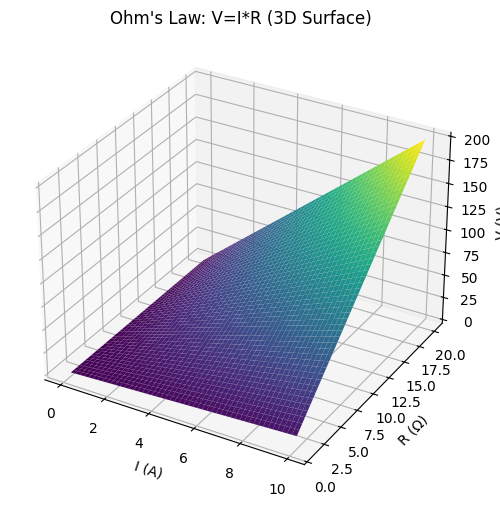

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

I_values = np.linspace(0, 10, 50)   # 電流
R_values = np.linspace(1, 20, 50)  # 抵抗

I_mesh, R_mesh = np.meshgrid(I_values, R_values)

V_mesh = I_mesh * R_mesh  # V=I*Rの計算(要素ごと)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(I_mesh, R_mesh, V_mesh, cmap='viridis')
ax.set_xlabel('I (A)')
ax.set_ylabel('R (Ω)')
ax.set_zlabel('V (V)')
ax.set_title('Ohm\'s Law: V=I*R (3D Surface)')
plt.show()


ここでは３つの軸でオームの法則の３つの変数を表しています。

I（電流）とR（抵抗）の公差する点でそれぞれ「高さ」があり、高さがV（電圧）。試しに、I=4、R=12.5あたりの点での高さを見てみましょう。おそらくV＝50ぐらいの高さ（V電圧）になっているはずです。いや、そうなるのは当たり前ですね、$V = I \times R$なので$50 = 4 \times 12.5$になります。

高さの極端な部分を見ることで、特徴がさらに理解できます。高さがとても大きい部分は黄色く見えます。ここではIとRの値が、このグラフでは最大の10と20になっているで電圧が200ぐらいになっていますし、逆にI=0の時の高さは、Rがどんなに大きくても０なのは、０に何を掛けても０ということで、ここまでは小学生レベルの掛け算だけでオームの法則が理解できます。

### 3次元のグラフを様々な角度からみる

p5.js を使ってインターアクティブに３Dグラフを見てみましょう(下のリンクをクリックすると別のページが開きます。マウスを使って視点を変えることが出来ます)

https://yoshiwatanabe.github.io/python-test/ohrms_law.html

## ３次元のイメージから２次元のイメージに理解を進める

３次元のイメージは全ての変数を表すので包括的で、全体象を掴むのには優れていますが、実際には使いにくいです。そこでオームの法則を２次元から２次元に変換してみましょう。この場合、次元数を３から２に減らすために、IとRのいずれかを固定します。

### 電流Iを2Aと8Aの固定値で２次元グラフに変化させてみる

例えば2アンペアの電流がコンスタントに流れているとして、回路に差し込む抵抗Rの値をいろいろと変えることが出来るとしたら、電圧Vはどのように変わるだろうか？ 同じように8Aの電流にした場合、抵抗Rの値の変化は電圧Vにどのような効果を与えるだろうか？

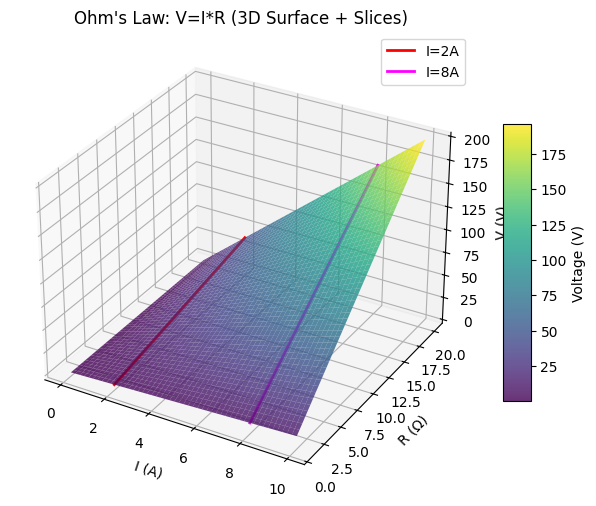

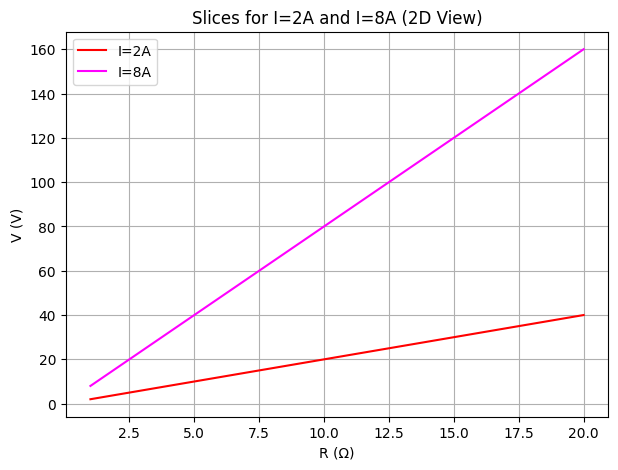

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def main():
    # -------------------------------
    # データの準備
    # -------------------------------
    I_values = np.linspace(0, 10, 50)   # 電流 (I)
    R_values = np.linspace(1, 20, 50)  # 抵抗 (R)

    # メッシュグリッドで (I, R) の格子点を生成
    I_mesh, R_mesh = np.meshgrid(I_values, R_values)

    # オームの法則 V=I*R
    V_mesh = I_mesh * R_mesh

    # スライスに使う固定値
    I_line_1 = 2
    I_line_2 = 8

    # スライス線用の配列 (R を動かす)
    R_line = np.linspace(1, 20, 50)
    V_line_1 = I_line_1 * R_line
    V_line_2 = I_line_2 * R_line

    # I を固定した配列 (3D plot用)
    I_line_array_1 = np.full_like(R_line, I_line_1)
    I_line_array_2 = np.full_like(R_line, I_line_2)

    # -------------------------------
    # 1つ目の Figure: 3Dサーフェイス
    # -------------------------------
    fig1 = plt.figure(figsize=(8, 6))
    ax3d = fig1.add_subplot(111, projection='3d')

    # 3D サーフェイスプロット
    surf = ax3d.plot_surface(I_mesh, R_mesh, V_mesh, cmap='viridis', alpha=0.8)
    fig1.colorbar(surf, ax=ax3d, shrink=0.6, aspect=10, label='Voltage (V)')

    # 3D サーフェイス上に I=2 の断面
    ax3d.plot(
        I_line_array_1, R_line, V_line_1,
        color='red', linewidth=2, label='I=2A'
    )
    # 3D サーフェイス上に I=8 の断面
    ax3d.plot(
        I_line_array_2, R_line, V_line_2,
        color='magenta', linewidth=2, label='I=8A'
    )

    ax3d.set_xlabel('I (A)')
    ax3d.set_ylabel('R (Ω)')
    ax3d.set_zlabel('V (V)')
    ax3d.set_title("Ohm's Law: V=I*R (3D Surface + Slices)")
    ax3d.legend()

    # -------------------------------
    # 2つ目の Figure: 2Dラインプロット
    # -------------------------------
    fig2, ax2d = plt.subplots(figsize=(7, 5))

    # R を横軸、V を縦軸で、I=2, I=8 の2本の線を描画
    ax2d.plot(R_line, V_line_1, color='red', label='I=2A')
    ax2d.plot(R_line, V_line_2, color='magenta', label='I=8A')

    ax2d.set_xlabel('R (Ω)')
    ax2d.set_ylabel('V (V)')
    ax2d.set_title("Slices for I=2A and I=8A (2D View)")
    ax2d.grid(True)
    ax2d.legend()

    plt.show()

if __name__ == "__main__":
    main()


上の２つのグラフで、それぞれ２つの直線が見えます。ひとつ目の３Dグラフではサーフェイスプロット上に傾きの異なる線が２つあり、それぞれ2Aと8Aの時にサーフェイスを「スライス」した時の直線になっています。

２つ目の２次元グラフでは「オレンジ色の直線」はI=2Aの時（電流が小さめの時）、「ピンク色の直線」はI=8A(電流が大きめの時)を表しています。

抵抗Rをどんどん大きくしていくと、いずれも電圧Vは比例して大きくなりますが、電流が大きいとき（ピンク色）の方が増え方が大きいという直感が得られます。

２次元グラフを考える時、それの元になった３次元グラフでのサーフェイスをイメージ出来ればオームの法則の理解は格段に深まります。

### 抵抗RをR=7.5Ω and R=17.5Ωの固定値で２次元グラフに変化させてみる

２つの独立変数IとRは同格（？）なので、今度は逆にRを固定して、どのように３次元グラフから２次元グラフに変換できるかを見てみましょう。

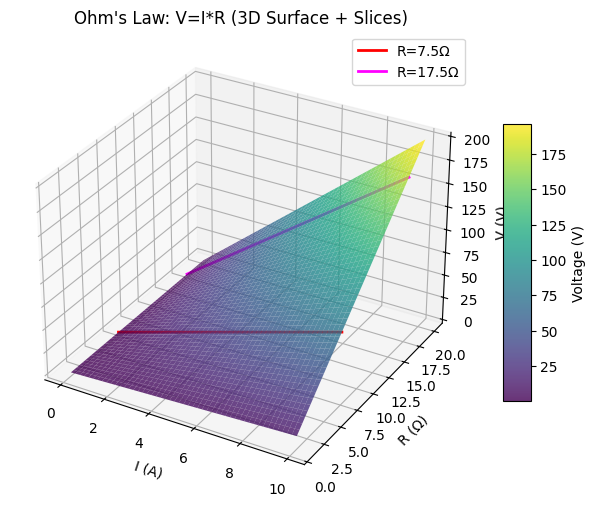

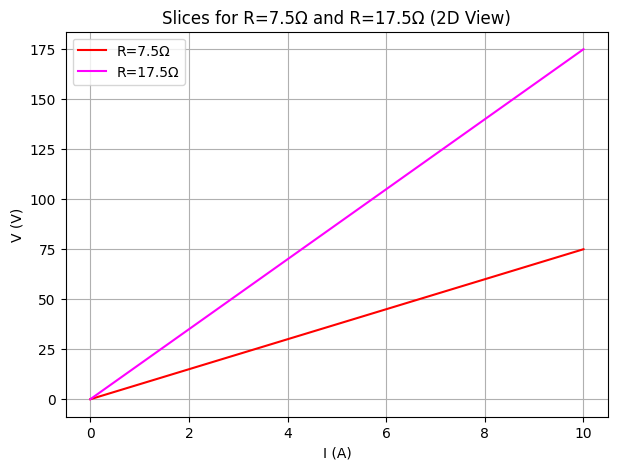

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def main():
    # -------------------------------
    # データの準備
    # -------------------------------
    I_values = np.linspace(0, 10, 50)   # 電流 (I)
    R_values = np.linspace(1, 20, 50)   # 抵抗 (R)

    # メッシュグリッドで (I, R) の格子点を生成
    I_mesh, R_mesh = np.meshgrid(I_values, R_values)

    # オームの法則 V = I * R
    V_mesh = I_mesh * R_mesh

    # スライスに使う固定値 (今回 R=7.5, R=17.5)
    R_line_1 = 7.5
    R_line_2 = 17.5

    # スライス線用の配列 (I を動かす)
    I_line = np.linspace(0, 10, 50)
    V_line_1 = I_line * R_line_1
    V_line_2 = I_line * R_line_2

    # R を固定した配列 (3D plot用)
    R_line_array_1 = np.full_like(I_line, R_line_1)
    R_line_array_2 = np.full_like(I_line, R_line_2)

    # -------------------------------
    # 1つ目の Figure: 3Dサーフェイス
    # -------------------------------
    fig1 = plt.figure(figsize=(8, 6))
    ax3d = fig1.add_subplot(111, projection='3d')

    # 3D サーフェイスプロット
    surf = ax3d.plot_surface(I_mesh, R_mesh, V_mesh, cmap='viridis', alpha=0.8)
    fig1.colorbar(surf, ax=ax3d, shrink=0.6, aspect=10, label='Voltage (V)')

    # 3D サーフェイス上に R=7.5 の断面 (I を変化させる)
    ax3d.plot(
        I_line, R_line_array_1, V_line_1,
        color='red', linewidth=2, label='R=7.5Ω'
    )
    # 3D サーフェイス上に R=17.5 の断面 (I を変化させる)
    ax3d.plot(
        I_line, R_line_array_2, V_line_2,
        color='magenta', linewidth=2, label='R=17.5Ω'
    )

    ax3d.set_xlabel('I (A)')
    ax3d.set_ylabel('R (Ω)')
    ax3d.set_zlabel('V (V)')
    ax3d.set_title("Ohm's Law: V=I*R (3D Surface + Slices)")
    ax3d.legend()

    # -------------------------------
    # 2つ目の Figure: 2Dラインプロット
    # -------------------------------
    fig2, ax2d = plt.subplots(figsize=(7, 5))

    # I を横軸、V を縦軸で、R=7.5, R=17.5 の2本の線を描画
    ax2d.plot(I_line, V_line_1, color='red', label='R=7.5Ω')
    ax2d.plot(I_line, V_line_2, color='magenta', label='R=17.5Ω')

    ax2d.set_xlabel('I (A)')
    ax2d.set_ylabel('V (V)')
    ax2d.set_title("Slices for R=7.5Ω and R=17.5Ω (2D View)")
    ax2d.grid(True)
    ax2d.legend()

    plt.show()

if __name__ == "__main__":
    main()


抵抗Rを固定した時も、はやり２次元グラフのX軸（電流I）を大きくすると電圧Vも比例して大きくなり、その傾きは抵抗Rが大きいほど急になっています。

ここまでで、電流Iか抵抗Rのいずれかを固定した場合、残りの変数との「掛け算」で電圧Vが決まることが分かりました。

オームの法則 $V = I \times R$

は３次元グラフに、傾きがある直線で構成されるサーフェイス（表面）を描くことをしっかりイメージしましょう。

## 電圧Vについて考える

次にVについて考えます。具体的には３次元グラフを「水平」にスライスすることで、ある電圧の値の時にどのような線（直線か曲線か？）が現れるかを見ます。

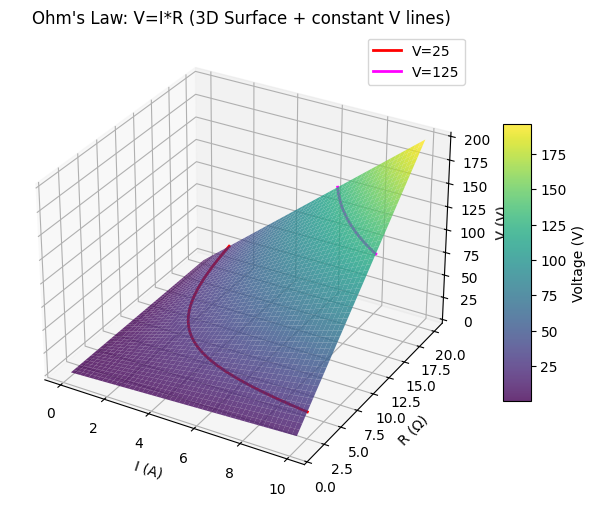

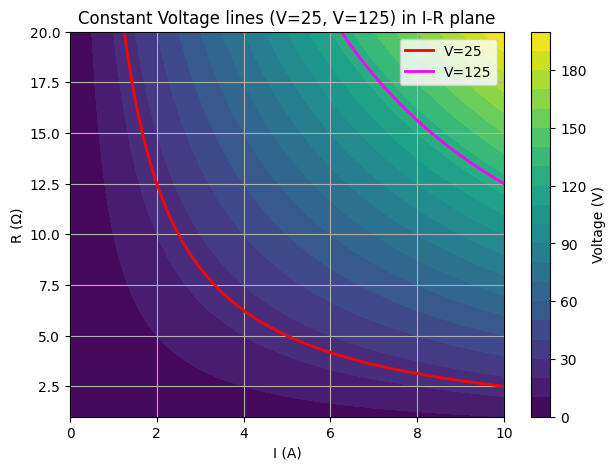

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def main():
    # -------------------------------
    # 1. 3Dサーフェイス用のデータを用意
    # -------------------------------
    I_values = np.linspace(0, 10, 50)   # 電流 (I)
    R_values = np.linspace(1, 20, 50)   # 抵抗 (R)

    # メッシュグリッドで (I, R) の格子点を生成
    I_mesh, R_mesh = np.meshgrid(I_values, R_values)

    # オームの法則による V=I*R を格子点上で計算
    V_mesh = I_mesh * R_mesh

    # -------------------------------
    # 2. V=25, V=125 となる (I,R) をパラメトリックに生成
    #    → Iの範囲を絞って R=V/I を計算
    # -------------------------------
    # (a) V=25 の場合
    #     I, R がともに正、 かつ I<=10, R<=20 の範囲で
    #     I*R=25 → R=25/I より、
    #     R <= 20 → 25/I <=20 → I >= 25/20=1.25
    #     R >= 1  → 25/I >=1 → I <=25
    #     あとは I<=10 の制限もあるので最終的に I ∈ [1.25, 10]
    I_line_25 = np.linspace(1.25, 10, 100)
    R_line_25 = 25 / I_line_25
    # 3D空間用の z は全て 25
    V_line_25 = np.full_like(I_line_25, 25)

    # (b) V=125 の場合
    #     I, R がともに正、 I<=10, R<=20 の範囲で
    #     I*R=125 → R=125/I
    #     R <= 20 → 125/I <=20 → I >=125/20=6.25
    #     R >= 1  → 125/I >=1 → I <=125
    #     さらに I<=10 で制限 → I ∈ [6.25, 10]
    I_line_125 = np.linspace(6.25, 10, 100)
    R_line_125 = 125 / I_line_125
    V_line_125 = np.full_like(I_line_125, 125)

    # -------------------------------
    # 3. 3Dサーフェイスプロット
    # -------------------------------
    fig1 = plt.figure(figsize=(8, 6))
    ax3d = fig1.add_subplot(111, projection='3d')

    # 3D サーフェイスを描画 (I,R)→V
    surf = ax3d.plot_surface(I_mesh, R_mesh, V_mesh, cmap='viridis', alpha=0.8)
    cb = fig1.colorbar(surf, ax=ax3d, shrink=0.6, aspect=10)
    cb.set_label('Voltage (V)')

    # サーフェイス上に "V=25" の線を重ねる
    ax3d.plot(
        I_line_25, R_line_25, V_line_25,
        color='red', linewidth=2, label='V=25'
    )
    # サーフェイス上に "V=125" の線を重ねる
    ax3d.plot(
        I_line_125, R_line_125, V_line_125,
        color='magenta', linewidth=2, label='V=125'
    )

    ax3d.set_xlabel('I (A)')
    ax3d.set_ylabel('R (Ω)')
    ax3d.set_zlabel('V (V)')
    ax3d.set_title("Ohm's Law: V=I*R (3D Surface + constant V lines)")
    ax3d.legend()

    # -------------------------------
    # 4. 2Dグラフ (I-R平面) に同じ定電圧線を描画
    # -------------------------------
    fig2, ax2d = plt.subplots(figsize=(7, 5))

    # まずは等高線プロットで全体像を示す (必須ではありません)
    #  (I,R)平面上の V=I*R の等高線群を描く
    #   V_mesh は shape(50,50) なので、I_mesh, R_mesh 同様に2D
    contour = ax2d.contourf(I_mesh, R_mesh, V_mesh, levels=20, cmap='viridis')
    plt.colorbar(contour, ax=ax2d, label='Voltage (V)')

    # その上に V=25 と V=125 の境界線を描画 (赤とマゼンタで上書き)
    ax2d.plot(I_line_25, R_line_25, color='red', linewidth=2, label='V=25')
    ax2d.plot(I_line_125, R_line_125, color='magenta', linewidth=2, label='V=125')

    ax2d.set_xlabel('I (A)')
    ax2d.set_ylabel('R (Ω)')
    ax2d.set_title("Constant Voltage lines (V=25, V=125) in I-R plane")
    ax2d.legend()
    ax2d.grid(True)

    plt.show()


if __name__ == "__main__":
    main()


上の２つのグラフのうち、ひとつ目の３次元グラフではV=25の時に水平にスライスした時に曲線（双曲線）が現れることが分かります。同様にV=125でも曲線が現れますが、その「カーブの具合」は少し直線気味に見えることも分かります。

上の２つのグラフの後者の２次元グラフは、立体グラフを真上からみた様子と同じです。電圧Vを固定したので「高さ」については考えなくてよくなったので次元を一つ抜いて、２次元グラフで表せます。

これらの曲線を解釈すると、すくなくとも以下の２通りの考え方が出来ます。

- 目的の電圧Ｖを得るためにどのような「電流Ｉと抵抗Ｒの組み合わせ」が必要かが分かる
- 一定の変わらない電圧（例えば電池などの電圧源）で電流Iの値を決めると、抵抗Rの値が決まる

（２つめは「抵抗Rの値を決めると、電流Iの値が決まる」とも言い換えられます）


例えばV=25の赤い曲線を見ると、電圧25Vを出すのに電流2Aが流れているなら12.5Ωの抵抗を差しはさめばよいと分かりますし、電流が8A流れているなら、必要な抵抗はだいたい3Ωぐらいだろうというのが分かります。

## オームの法則の変形式 $電流I = \frac{電圧V}{抵抗R}$ と $抵抗R = \frac{電圧V}{電流I}$を理解する

よく、オームの法則を覚えるのに円に横線と縦線を書いて、Vが上に、RとIが下にあるイメージで、オームの法則を「暗記する」方法が紹介されてきましたが、あれは上手くいきません。なぜなら３つの変数の関係などを理解せずに暗記してしまうと、いずれは忘れてしまうからです。

代りに、電圧が変わらない（定電圧）の時のIとRの関係を表す曲線上で、抵抗Rが決まれば電流Iも決まるということは $\frac{（定数）}{抵抗R}$ と同じことで、これは$電流I = \frac{電圧V}{抵抗R}$という、なかなか暗記が難しいオームの法則の式と同じことです。

以下に、この式のイメージをグラフにしてみます。

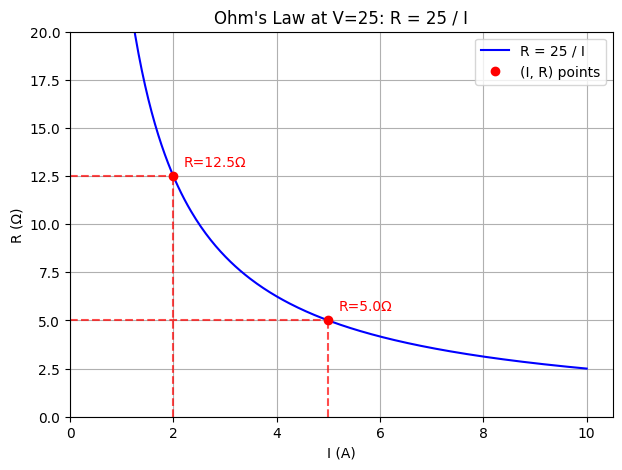

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    # -------------------------------
    # 1. 双曲線 (V=25) の描画用データ
    # -------------------------------
    # I は 0に近い値では R が非常に大きくなるため、
    # ある程度 >0 の下限を設定 (ここでは I=0.5 から 10)
    I_line = np.linspace(0.5, 10, 300)
    V = 25
    R_line = V / I_line  # R = 25 / I
    
    # -------------------------------
    # 2. 例として I=2, I=5 の点を示す
    # -------------------------------
    I_points = np.array([2, 5])
    R_points = V / I_points  # [25/2=12.5, 25/5=5]

    # -------------------------------
    # 3. グラフの描画
    # -------------------------------
    fig, ax = plt.subplots(figsize=(7,5))

    # (a) 双曲線を描画
    ax.plot(I_line, R_line, color='blue', label='R = 25 / I')

    # (b) 例の2点をマーカーで描画
    ax.plot(I_points, R_points, 'ro', label='(I, R) points')

    # (c) 点線で軸と結ぶ (縦線＋横線)
    #     - これにより「I 軸から拾った電流で対応する R が決まる」様子を可視化
    for i, r in zip(I_points, R_points):
        # 縦線 (I固定で0→R)
        ax.plot([i, i], [0, r], color='red', linestyle='--', alpha=0.7)
        # 横線 (R固定でi→0)
        ax.plot([0, i], [r, r], color='red', linestyle='--', alpha=0.7)

        # (d) テキスト注釈 (任意)
        #     - 例えば点の少し上に R=xxΩ と表示
        ax.text(i+0.2, r+0.5, f"R={r:.1f}Ω", color='red')

    # -------------------------------
    # 軸の範囲・ラベルなどの設定
    # -------------------------------
    ax.set_xlim(0, 10.5)
    ax.set_ylim(0, 20)  # 以前よく使っていた範囲に合わせて R=0~20
    ax.set_xlabel("I (A)")
    ax.set_ylabel("R (Ω)")
    ax.set_title("Ohm's Law at V=25: R = 25 / I")
    ax.grid(True)
    ax.legend()

    plt.show()

if __name__ == "__main__":
    main()


上のグラフでは$抵抗R = \frac{25V}{電流I}$ を曲線から決定する様子をしめしています。X軸の値が2Aの時、Y軸Rの値は12.5になります。

$$
12.5(Ω) = \frac{25(V)}{2(A)}
$$

当たり前ですが、この曲線上のどの点でもX軸の値とY軸の値の積は25になるようになっています。ですから、X軸の値が５の時は

$$
5(Ω) = \frac{25(V)}{5(A)}
$$

になります。

もちろん、$電流I = \frac{25V}{抵抗R}$ として考えても全く同じです。

最後に、V=25とV=125の曲線が違って見えることについて考えてみます。

## 電圧が大きい時の曲線はなぜ直線に近く見えるのか

これまでのグラフでのX軸とY軸の値の範囲を広げて、特にV=125の曲線がどのように見えるかを観察してみましょう。

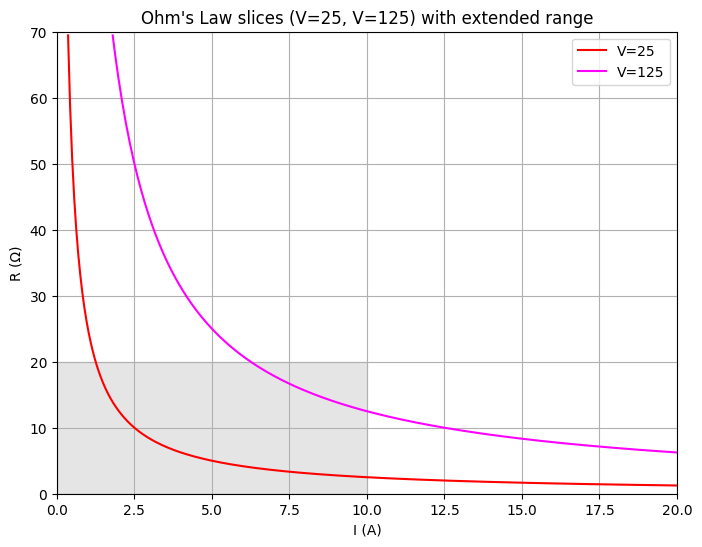

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    # ------------------------------------------------------
    # 1. 広い範囲: I = [0, 20], R = [0, 70]
    # ------------------------------------------------------
    # V=25 の場合、R=25/I ≤70 → I ≥25/70=0.357...
    #   ⇒ Iを0.36くらいから20まで
    # V=125 の場合、R=125/I ≤70 → I ≥125/70=1.7857...
    #   ⇒ Iを1.8くらいから20まで

    # (V=25) 双曲線の描画用データ
    I_line_25 = np.linspace(0.36, 20, 300)
    R_line_25 = 25 / I_line_25

    # (V=125) 双曲線の描画用データ
    I_line_125 = np.linspace(1.8, 20, 300)
    R_line_125 = 125 / I_line_125

    # ------------------------------------------------------
    # 2. プロットの準備
    # ------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 6))

    # (a) 以前の範囲 (I=0~10, R=0~20) を半透明の矩形で表示
    #     左下 (0,0) から 幅=10, 高さ=20 の長方形
    rect = plt.Rectangle(
        (0, 0),  # 左下座標
        10,      # 幅(ΔI)
        20,      # 高さ(ΔR)
        color='gray',
        alpha=0.2  # 半透明度
    )
    ax.add_patch(rect)

    # (b) 双曲線 (定電圧線) を描画
    ax.plot(I_line_25, R_line_25, color='red', label='V=25')
    ax.plot(I_line_125, R_line_125, color='magenta', label='V=125')

    # ------------------------------------------------------
    # 3. 軸の範囲を大きくとる
    # ------------------------------------------------------
    ax.set_xlim(0, 20)  # I軸 0～20
    ax.set_ylim(0, 70)  # R軸 0～70

    # 軸ラベルやタイトルの設定
    ax.set_xlabel('I (A)')
    ax.set_ylabel('R (Ω)')
    ax.set_title('Ohm\'s Law slices (V=25, V=125) with extended range')
    ax.grid(True)
    ax.legend()

    plt.show()

if __name__ == "__main__":
    main()




上のグラフでは、これまでに見てきた２次元グラフでの範囲が灰色の長方形で示されています。

V=125の曲線が直線気味に見えたのは２次元グラフでの範囲が狭かったからであって、実は同じような曲線でした。

２つの曲線はともに分子が１の $R = \frac{1}{I}$という標準的な双曲線（もちろん $I = \frac{1}{R}$ と考えても良い）を25倍にスケールするか125倍にスケールするかの違いがあるだけです。この場合の２つの曲線は５倍の違いがあるので、範囲の狭いグラフではV=125の方が収まり切れなかったので「やや直線に見える部分」だけが見えていたわけです。